In [1]:
import ogstools as ot
import matplotlib.pyplot as plt

In [2]:
project = ot.Project(input_file='1D_AdvectionDiffusionSorptionDecay.prj', output_file='test.prj')
project.write_input()

In [3]:
project.run_model()

OGS finished with project file test.prj.
Execution took 12.815564155578613 s
Project file written to output.


In [4]:
results = ot.MeshSeries('1D_AdvectionDiffusionSorptionDecay.pvd')

In [5]:
def plot_concentrations(pvd):
    fig, ax = plt.subplots()
    for k, t in enumerate(pvd.timevalues):
        data = pvd[k].sample_over_line([0, 0, 0], [20, 0, 0])
        x = data['Distance']
        val = data['Cs']
        ax.plot(x,val,label='$t = %.1f$ a' %(t/(24*60*60*365)))
    ax.set_xlabel('$x$ / m')
    ax.set_ylabel('$c/c_0$')
    fig.legend()

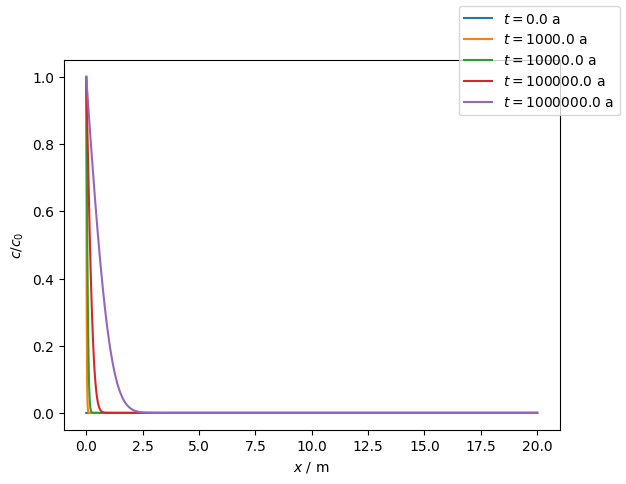

In [6]:
plot_concentrations(results)

In [7]:
modified = ot.Project(input_file='1D_AdvectionDiffusionSorptionDecay.prj', output_file='test.prj')
modified.replace_text("modified", xpath="./time_loop/output/prefix")
modified.replace_parameter_value(name='p_Neumann',value=4e-7)
modified.write_input()

In [8]:
modified.run_model()

OGS finished with project file test.prj.
Execution took 12.436468839645386 s
Project file written to output.


In [9]:
results_modified = ot.MeshSeries('modified.pvd')

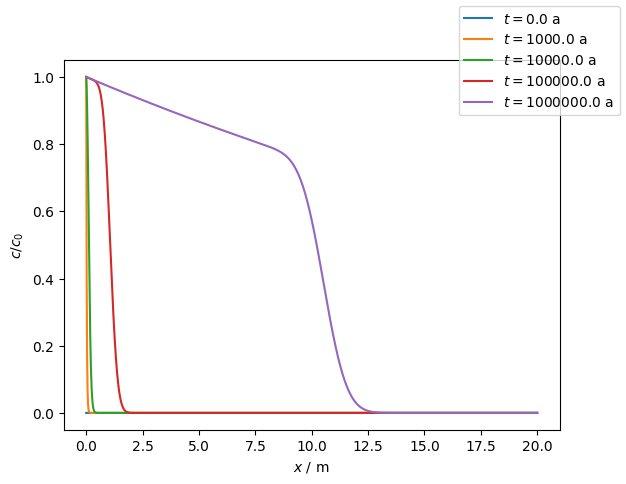

In [10]:
plot_concentrations(results_modified)

In [11]:
modified.replace_phase_property_value(mediumid=0,phase='AqueousLiquid',component='Cs',name='retardation_factor', value=5000)
modified.write_input()

In [12]:
modified.run_model()

OGS finished with project file test.prj.
Execution took 12.362681865692139 s
Project file written to output.


In [13]:
results_modified = ot.MeshSeries('modified.pvd')

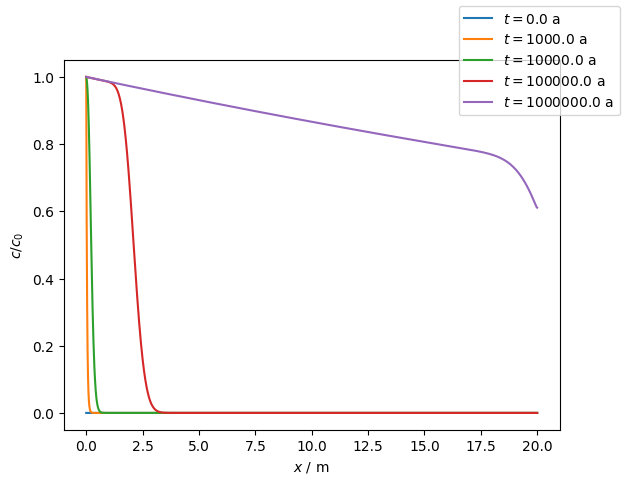

In [14]:
plot_concentrations(results_modified)